In [1]:
import numpy as np
import scipy as sp
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pylab

#We initiate our printing as nice equations, using the sympy package 
sm.init_printing(use_unicode=True)


In [11]:
#defining all variables as symby symbols 
q1 = sm.symbols('q_1')
q2 = sm.symbols('q_2')
c = sm.symbols('c')
a = sm.symbols('a')
b = sm.symbols("b")
pi1 = sm.symbols('pi_1')
pi2 = sm.symbols('pi_2')

#Now we define the equations describing the relationship between the two firms 
#prices (p), costs(c), someting(a), revenue(pi) and quantity(q).
p1 = (a-b*(q1+q2))
p2 = (a-b*(q1+q2))
pi1 =(p1*q1-c*q1)
pi2 = (p2*q2-c*q2)


In [12]:
#Take the derivative wrt. to q1 and q2 respecticly
#to get the optimal quantity of firm 1 and firm 2:

foc1=sm.diff(pi1,q1)
foc1

foc2=sm.diff(pi2,q2)
foc2

In [7]:
# We solve the first firms equation equal to 0
sol1= sm.solve(sm.Eq(foc1,0),q1)[0]
sol1

In [6]:
# We solve the second firms equation equal to 0
sol2= sm.solve(sm.Eq(foc2,0),q2)[0]
sol2


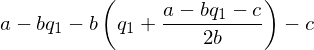

In [76]:
#We then substitute the q2 in equation 1
sol1_subs = foc1.subs(q2,sol2)
sol1_subs


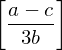

In [77]:
#then we solve the first equation for the quantity
sol1_subs_solve = sm.solve(sm.Eq(sol1_subs,0),q1)
sol1_subs_solve

In [78]:
#Needs commenting and docstrnigs
def reaction(q_other, a=100, b=1, cost=1,print_it=False):
    quantity = (a-b*q_other - cost)/2*b
    
    if print_it:
        print("Given the other firm produces",q_other,"The firm will produce", quantity, sep=" ")
        return
    else:
        return quantity

In [79]:
#Needs commenting and docstrnigs

def reaction_plot(q_other, a=100, b=1, cost=1,scatter=True, price = False):
    quantity = reaction(q_other,a, b, cost)
    
    #ax = plt.subplot()
    if scatter == True :
        plt.scatter(quantity,q_other,label = "Firm 1's reaction curve")
        plt.scatter(q_other,quantity,label = "Firm 2's reaction curve")
    else : 
        plt.plot(quantity,q_other,label = "Firm 1's reaction curve")
        plt.plot(q_other,quantity,label = "Firm 2's reaction curve")
        
    plt.xlabel("Firm 1 quantity")
    plt.ylabel("Firm 2 quantity")
    plt.legend()
    plt.xlim(0,100)
    plt.ylim(0,100)
    
    if price :
        price = a-b*(q_other+quantity)
        return price
    plt.show()
    return 

In [80]:
#Needs commenting and docstrnigs

def optimal(a, b, cost, text=True):
    equilibrium = (a-cost)/3*b
    equilibrium = round(equilibrium,0)
    if text==False:
        return equilibrium
    else:
        print("The Cournot equilibrium, given that","a =",a,", b =","and that cost =",cost,",","is:",equilibrium)


In [81]:
qslider = widgets.IntSlider(min=0,max=100,step=1,value=50)

widgets.interact(reaction,q_other = qslider,a=widgets.fixed(100),b=widgets.fixed(1),cost=widgets.fixed(1),print_it=widgets.fixed(True))

interactive(children=(IntSlider(value=50, description='q_other'), Output()), _dom_classes=('widget-interact',)…

<function __main__.reaction(q_other, a=100, b=1, cost=1, print_it=False)>

In [82]:
print("The equilibrium we derived earlier as:")

sm.pprint(sol1_subs_solve,use_unicode=True)

print("Which given a = 100, b= 1 and cost = 1, is:",optimal(100,1,1))

The equilibrium we derived earlier as:
⎡a - c⎤
⎢─────⎥
⎣ 3⋅b ⎦
The Cournot equilibrium, given that a = 100 , b = and that cost = 1 , is: 33.0
Which given a = 100, b= 1 and cost = 1, is: None


In [83]:
a_slider = widgets.IntSlider(min=10,max=150,step=1,value=50)
b_slider = widgets.IntSlider(min=1,max=10,step=1,value=1)
cost_slider = widgets.IntSlider(min=1,max=50,step=1,value=1)

widgets.interact(optimal,a=a_slider,b=b_slider,cost=cost_slider,r=widgets.fixed(False))

interactive(children=(IntSlider(value=50, description='a', max=150, min=10), IntSlider(value=1, description='b…

<function __main__.optimal(a, b, cost, text=True)>

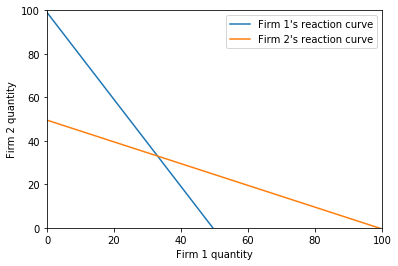

In [84]:
x = np.linspace(0, 100, 1000);
reaction_plot(q_other=x,scatter=False)

In [85]:
ai_slider = widgets.IntSlider(min=10,max=150,step=1,value=100)
bi_slider = widgets.IntSlider(min=1,max=5,step=1,value=1)
costi_slider = widgets.IntSlider(min=1,max=50,step=1,value=1)
widgets.interact(reaction_plot,q_other=widgets.fixed(x),a=ai_slider,b=bi_slider,cost=costi_slider, scatter = widgets.fixed(False), price = widgets.fixed(False))




interactive(children=(IntSlider(value=100, description='a', max=150, min=10), IntSlider(value=1, description='…

<function __main__.reaction_plot(q_other, a=100, b=1, cost=1, scatter=True, price=False)>

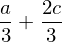

In [86]:
#Here we put in the price and the symbollic estimation of it
price_1 = p1.subs([(q1,sol1_subs_solve[0]), (q2, sol1_subs_solve[0])])
price_1



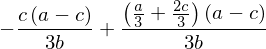

In [87]:
pi = pi1.subs([(p1,price_1), (q1,sol1_subs_solve[0])])
pi

In [88]:
#Here we define a function that returns the price and the equilirbrium 

In [104]:
def price_eq(q_other, a = 100, b = 1, cost = 1):
    q = reaction(q_other, a, b, cost)
    
    price = a-b*(q_other+q)
    
    opt_q = optimal(a, b, cost, text = False)
    if price > 0:
        print("The price in the Cournot equilibrium is",price)
        print("The quantity that the two firms will produce in the Cournor equilibrium is",opt_q)
    else:
        print("Price can't be negative")
    


In [105]:
qp_slider = widgets.IntSlider(min=10,max=101,step=1,value=50)
ap_slider = widgets.IntSlider(min=10,max=100,step=1,value=100)
bp_slider = widgets.IntSlider(min=1,max=5,step=1,value=1)
costp_slider = widgets.IntSlider(min=1,max=50,step=1,value=1)
widgets.interact(price_eq,q_other=qp_slider, a = ap_slider, b= bp_slider, cost = costp_slider)

interactive(children=(IntSlider(value=50, description='q_other', max=101, min=10), IntSlider(value=100, descri…

<function __main__.price_eq(q_other, a=100, b=1, cost=1)>

In [91]:
def profit(p1,q1,c):
    return p1*q1-c*q1 

In [ ]:
def root_func(q1, q2=20, a = 100, b= 1, c=1):
    x1 = a-b*q1 -b*(q1+q2)-c
    x2 = a-b*q2 -b*(q1+q2)-c
    
    diff_1 = abs(0 - x1)
    diff_2 = abs(0 - x2)
    
    return diff_1, diff_2  
    


In [ ]:
root_func(30,36)

In [ ]:
obj = lambda q: root_func(q1 = q,q2=20,a=100,b=1,c=1)
obj(1)

In [ ]:

#sol = sp.optimize.minimize(obj, x0=(1))
#obj = lambda q: profit(p1,q,cost)
#sol = sp.optimize.minimize(obj,0

In [55]:
#definition of the cost which is a function of the quantity
def cost(n,C) :
    if n == 0:
        cost = 0
    else:
        cost = C*n
    return cost

In [56]:
#definition of the demand function
#we take our price function (a-b*(q1+q2)) and set a=1 in this exercice. b is a coefficient which represent the impact of the quantity on the price
#Indeed less a production is rare less the price will be. We can also add a coefficient "k" which can represent the heterogeneity
#between q1 and q2 but we will juste assume the perfect substitution in our problem set
def demand(n1,n2,B):
    return 1 - B*(n1+n2)

In [61]:
def profit1(n1,n2,C1,B):
    return demand(n1,n2,B)*n1 - cost(n1,C1)

In [70]:
#As priviously, in a cournot model the firms set their quantities (production) given the quantity of the other firm.
#Which is why we need the reaction function and to get it we have to maximize (here minimize -f(x)) the profit function.
def reacfunction(n1,n2,C1,B):
    x1 = optimize.brute(lambda x: -profit1(n1,n2,C1,B), ((0,1,),)) # brute minimizes the function;
    return x1[0]

In [71]:
#we define a vector which take the vector first guess and the vector parameters (that we will define after) as input for our model
def vector_reaction(x,param): # vector param = (B,C1,C2)
    return np.array(x)-np.array([reacfunction(x[0],x[1],param[1],param[0]),reacfunction(x[1],x[0],param[2],param[0])])

In [72]:
#we create a vector with the value of the parameters 
param = [0.01,0.0,0.0]
x = [0.3, 0.3]

ans = optimize.fsolve(vector_reaction, x0, args = (param))
ans

TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'vector_reaction'.Shape should be (2,) but it is (2, 2).